# Assignment No. 2

### Data exploration and enrichment for supervised classification

Trabalho feito por: João Castro, Eduardo Oliveira e Duarte Reis

## Índice

1. [Introducão](#1.-Introdução)

2. [Bibliotecas importadas](#2.-Bibliotecas-importadas)

3. [Identificação do problema](#3.-Identificação-do-problema)

4. [Ánalise dos dados e pré-processamento](#4.-Ánalise-dos-dados-e-pré-processamento)


## Introdução

A ciência de dados tem desempenhado um papel fundamental na previsão e análise de dados em diversas áreas. Esta, a partir de uma grande base de dados, fornece-nos detalhes valiosos que poderão ser usados para prever possíveis resultados.

Neste trabalho, iremos aplicar as ferramentas referidas nas aulas a um conjunto de dados sobre pacientes diagnosticados com HCC (Hepatocellular Carcinoma) fornecido pelo hospital de Coimbra. O nosso objetivo é criar uma pipeline capaz de determinar se os pacientes vivem ou morrem 1 ano após diagnóstico.

Para isso iremos usar o Jupyter Notebook e a linguagem Python.

## Bibliotecas importadas

Para este trabalho usámos o Anaconda Python distribution e desta forma tinhamos acesso às diversas bibliotecas do Python necessárias:

- **NumPy**: Fornece um grande conjunto de funções auxiliares e operações de biblioteca que executam cálculos numéricos.
- **pandas**: Permite a análise e manipulação dos dados a partir da memória de forma eficiente.
- **scikit-learn**: Pacote essencial de machine learning em Python com ferramentas eficazes para a análise preditiva de dados.
- **matplotlib**: Permite criar gráficos e visualizar dados de forma mais clara
- **Seaborn**: Trabalha em conjunto com o Matplotlib e melhora o visual dos gráficos

In [1]:
import random
import sys
import pandas as pd 
import numpy as np  
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report , roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Identificação do problema

Este trabalho consiste na análise exploratória de dados e na aplicação de modelos de aprendizagem supervisionada. Será analisado um dataframe de cerca de 165 pacientes com 49 parâmetros de saúde avaliados. O objetivo final é a criação de uma machine learning pipeline capaz de prever se os pacientes sobrevivem ou não após um ano do diagnóstico.

## Ánalise dos dados e pré-processamento

Começamos por analisar os dados com que estamos a trabalhar com o intuito de verificar se existem omissões de valores ou erros de forma a eliminar os dados que são irrelevantes para a análise.

In [2]:
df = pd.read_csv("hcc_dataset.csv")

In [3]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,Dies


Após uma análise rápida do dataset vemos que existem 165 pacientes e 50 colunas de dados sobre a saúde de cada um. Como 50 colunas é um valor demasiado elevado e já nos apercebemos que existem diversos valores em falta, conotados como "?", vamos proceder a uma eliminação das colunas com maior falta de dados pois elas são irrelevantes para a análise final. Para isso vamos eliminar as colunas com pelo menos 50 células inválidas.

In [4]:
num_question_marks = df.apply(lambda col: col.eq('?').sum())
df = df.loc[:, num_question_marks <= 50]

In [5]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,34,41,183,150,7.1,0.7,1,3.5,0.5,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,?,?,?,1,1.8,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,58,68,202,109,7,2.1,5,13,0.1,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,16,64,94,174,8.1,1.11,2,15.7,0.2,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,147,306,173,109,6.9,1.8,1,9,?,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,35,40,449,109,7.6,0.7,5,3,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,50,91,147,280,6.7,0.7,1,2.2,2.3,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,53,52,164,181,7.5,1.46,5,18.6,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,50,60,320,170,8.4,0.74,5,18,?,Dies


Agora vamos usar a mesma lógica para remover aqueles pacientes que entre os 46 tópicos de saúde que sobraram, têm pelo menos metade dos parâmetros não respondidos.

In [6]:
num_question_marks_row = df.apply(lambda row: row.eq('?').sum(), axis=1)
df = df[num_question_marks_row <= 23]

In [7]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,34,41,183,150,7.1,0.7,1,3.5,0.5,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,?,?,?,1,1.8,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,58,68,202,109,7,2.1,5,13,0.1,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,16,64,94,174,8.1,1.11,2,15.7,0.2,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,147,306,173,109,6.9,1.8,1,9,?,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,35,40,449,109,7.6,0.7,5,3,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,50,91,147,280,6.7,0.7,1,2.2,2.3,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,53,52,164,181,7.5,1.46,5,18.6,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,50,60,320,170,8.4,0.74,5,18,?,Dies


Não foram removidos pacientes o que significa que todos têm maior parte dos parâmetros respondidos.

Agora vamos substituir os "?" por NaN (Not a Number) e os None da coluna "Ascites" e "Encephalothy" por "Nonexistent"

In [8]:
df["Ascites"].replace("?", np.nan, inplace=True)

In [9]:
df["Ascites"].replace(np.nan, "Nonexistent", inplace=True)
df["Encephalopathy"].replace(np.nan, "Nonexistent", inplace=True)
df.replace("?",np.nan, inplace= True)

In [10]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,34,41,183,150,7.1,0.7,1,3.5,0.5,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1.8,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,58,68,202,109,7,2.1,5,13,0.1,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,16,64,94,174,8.1,1.11,2,15.7,0.2,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,147,306,173,109,6.9,1.8,1,9,NaN,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,...,35,40,449,109,7.6,0.7,5,3,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,...,50,91,147,280,6.7,0.7,1,2.2,2.3,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,53,52,164,181,7.5,1.46,5,18.6,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,50,60,320,170,8.4,0.74,5,18,NaN,Dies


Temos bastante dados em falta, por isso vamos eliminar os pacientes com dados em falta.

In [11]:
df_2 = df.dropna()

In [12]:
df_2

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,58,68,202,109,7,2.1,5,13,0.1,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,16,64,94,174,8.1,1.11,2,15.7,0.2,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,26,59,115,63,6.1,0.59,1,6.4,1.2,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,...,71,45,256,303,7.1,0.59,1,9.3,0.7,Lives
15,Female,No,Yes,No,No,No,No,Yes,No,No,...,24,57,163,176,5,0.8,2,2.6,1.3,Lives
21,Male,No,Yes,No,No,Yes,Yes,Yes,No,Yes,...,54,47,52,97,6.3,0.75,1,6.8,0.2,Lives
23,Male,Yes,Yes,No,No,No,No,Yes,Yes,Yes,...,217,86,879,396,7,0.53,5,15,1.6,Dies
28,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,59,85,419,293,7.7,0.67,2,6.5,0.4,Dies
36,Male,Yes,Yes,No,No,No,No,Yes,No,No,...,38,74,180,127,5.6,0.88,5,3.1,3.3,Dies
38,Male,No,Yes,No,No,No,No,Yes,No,No,...,18,26,174,92,7.3,0.8,2,6,0.3,Lives


Podemos ver que é impossível trabalhar apenas com os pacientes que tem os dados todos, ficariamos com um dataset demasiado pequeno. Logo vamos recorrer a métodos de recuperação de dados.

Vamos ver quantas células por coluna contêm valores inválidos

In [13]:
df.isnull().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
PS                 0
Encephalopathy     1
Ascites            0
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Class              0
dtype: int64

Vamos começar por alterar os valores em falta das colunas numéricas, para tal vou adicionar a média das colunas nos espaços em branco

In [14]:
cols_to_fill = df.columns[27:-1]
for col in cols_to_fill:
    col_mean = df[col].dropna().astype(float).mean()
    df[col] = df[col].fillna(col_mean)

In [15]:
col_mean = df['Grams_day'].dropna().astype(float).mean()
df['Grams_day'] = df['Grams_day'].fillna(col_mean)

In [16]:
df.isnull().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day          0
PS                 0
Encephalopathy     1
Ascites            0
INR                0
AFP                0
Hemoglobin         0
MCV                0
Leucocytes         0
Platelets          0
 Albumin           0
Total_Bil          0
ALT                0
AST                0
GGT                0
ALP                0
TP                 0
Creatinine         0
Nodules            0
Major_Dim          0
Dir_Bil            0
Class              0
dtype: int64

Para alterar as colunas categóricas, pretendo utilizar o algoritmo KNN (k-Nearest Neighbors), e para tal, vou converter as palavras em números.

In [17]:
mapping = {
    "No": 0,
    "Yes": 1,
    "Active": 2,
    "Ambulatory": 3,
    "Restricted": 4,
    "Selfcare": 5,
    "Disabled": 6,
    "Nonexistent": 7,
    "Grade I/II": 8,
    "Grade III/IV": 9,
    "Mild": 10,
    "Moderate/Severe": 11,
    "Male": 12,
    "Female": 13,
    "Lives": 14,
    "Dies": 15,
}

df.replace(mapping, inplace=True)

In [18]:
df_subset = df.iloc[:, 0:26]

imputer = KNNImputer(n_neighbors=1)

df_subset_filled = pd.DataFrame(imputer.fit_transform(df_subset), columns=df_subset.columns)

df.iloc[:, 0:26] = df_subset_filled

In [19]:
df.isnull().sum()

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
 Albumin          0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodules           0
Major_Dim         0
Dir_Bil           0
Class             0
dtype: int64

Aproveitando o facto de termos o dataframe inteiramente com números, vamos fazer um heatmap que pode servir para tirar algumas conclusões mais tarde.

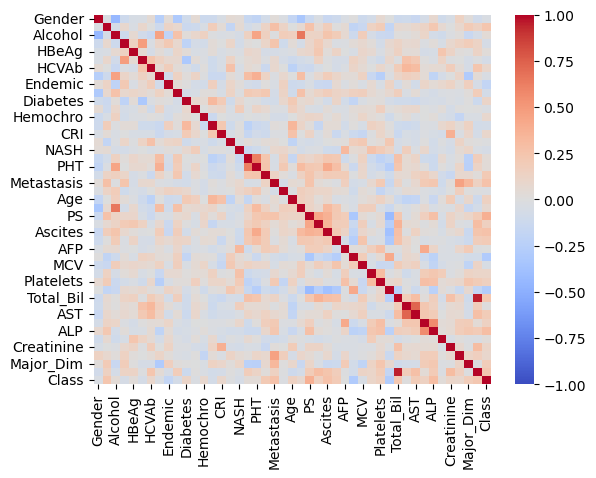

In [20]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Agora que não existem valores nulos, vamos converter os valores categóricos, que estão em forma de número, de volta para string.

In [21]:
mapping = {
    "No": 0,
    "Yes": 1,
    "Active": 2,
    "Ambulatory": 3,
    "Restricted": 4,
    "Selfcare": 5,
    "Disabled": 6,
    "Nonexistent": 7,
    "Grade I/II": 8,
    "Grade III/IV": 9,
    "Mild": 10,
    "Moderate/Severe": 11,
    "Male": 12,
    "Female": 13,
    "Lives": 14,
    "Dies": 15,
}

reverse_mapping = {v: k for k, v in mapping.items()}

df.iloc[:, 0:df.columns.get_loc("Hallmark")+1] = df.iloc[:, 0:df.columns.get_loc("Hallmark")+1].replace(reverse_mapping)

df.loc[:, "PS":"Ascites"] = df.loc[:, "PS":"Ascites"].replace(reverse_mapping)
df["Gender"] = df["Gender"].replace(reverse_mapping)
df["Class"] = df["Class"].replace(reverse_mapping)

Antes de avançarmos para a análise exploratória vamos definir corretamente o tipo de dados de cada coluna.

In [22]:
columns_converted_to_float = ['Age', 'Grams_day', 'INR', 'AFP', 'Hemoglobin', 'MCV', 
                              'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 
                              'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 
                              'Nodules', 'Major_Dim', 'Dir_Bil']

df[columns_converted_to_float] = df[columns_converted_to_float].astype(float).round(4)

all_columns = set(df.columns)

columns_to_convert_to_object = list(all_columns - set(columns_converted_to_float))

df[columns_to_convert_to_object] = df[columns_to_convert_to_object].astype('object')

df['Age'] = df['Age'].astype('int')
df['Nodules'] = df['Nodules'].astype('int')

print(df.dtypes)


Gender             object
Symptoms           object
Alcohol            object
HBsAg              object
HBeAg              object
HBcAb              object
HCVAb              object
Cirrhosis          object
Endemic            object
Smoking            object
Diabetes           object
Obesity            object
Hemochro           object
AHT                object
CRI                object
HIV                object
NASH               object
Spleno             object
PHT                object
PVT                object
Metastasis         object
Hallmark           object
Age                 int64
Grams_day         float64
PS                 object
Encephalopathy     object
Ascites            object
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
 Albumin          float64
Total_Bil         float64
ALT               float64
AST               float64
GGT               float64
ALP         

In [23]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,34.0000,41.0000,183.0000,150.0000,7.100,0.7000,1,3.5,0.50,Lives
1,Female,Yes,No,No,No,No,Yes,Yes,Yes,No,...,67.0932,96.3827,268.0265,212.2116,8.961,1.1271,1,1.8,1.93,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,58.0000,68.0000,202.0000,109.0000,7.000,2.1000,5,13.0,0.10,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,16.0000,64.0000,94.0000,174.0000,8.100,1.1100,2,15.7,0.20,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,147.0000,306.0000,173.0000,109.0000,6.900,1.8000,1,9.0,1.93,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,No,No,No,Yes,Yes,No,Yes,...,35.0000,40.0000,449.0000,109.0000,7.600,0.7000,5,3.0,1.93,Lives
161,Female,Yes,No,No,No,No,No,Yes,No,No,...,50.0000,91.0000,147.0000,280.0000,6.700,0.7000,1,2.2,2.30,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,53.0000,52.0000,164.0000,181.0000,7.500,1.4600,5,18.6,1.93,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,50.0000,60.0000,320.0000,170.0000,8.400,0.7400,5,18.0,1.93,Dies


Temos o dataframe limpo após este reajustamento dos dados.

## Análise exploratória

Vamos fazer alguns histogramas de modo a analisar os parâmetros categóricos do dataset.

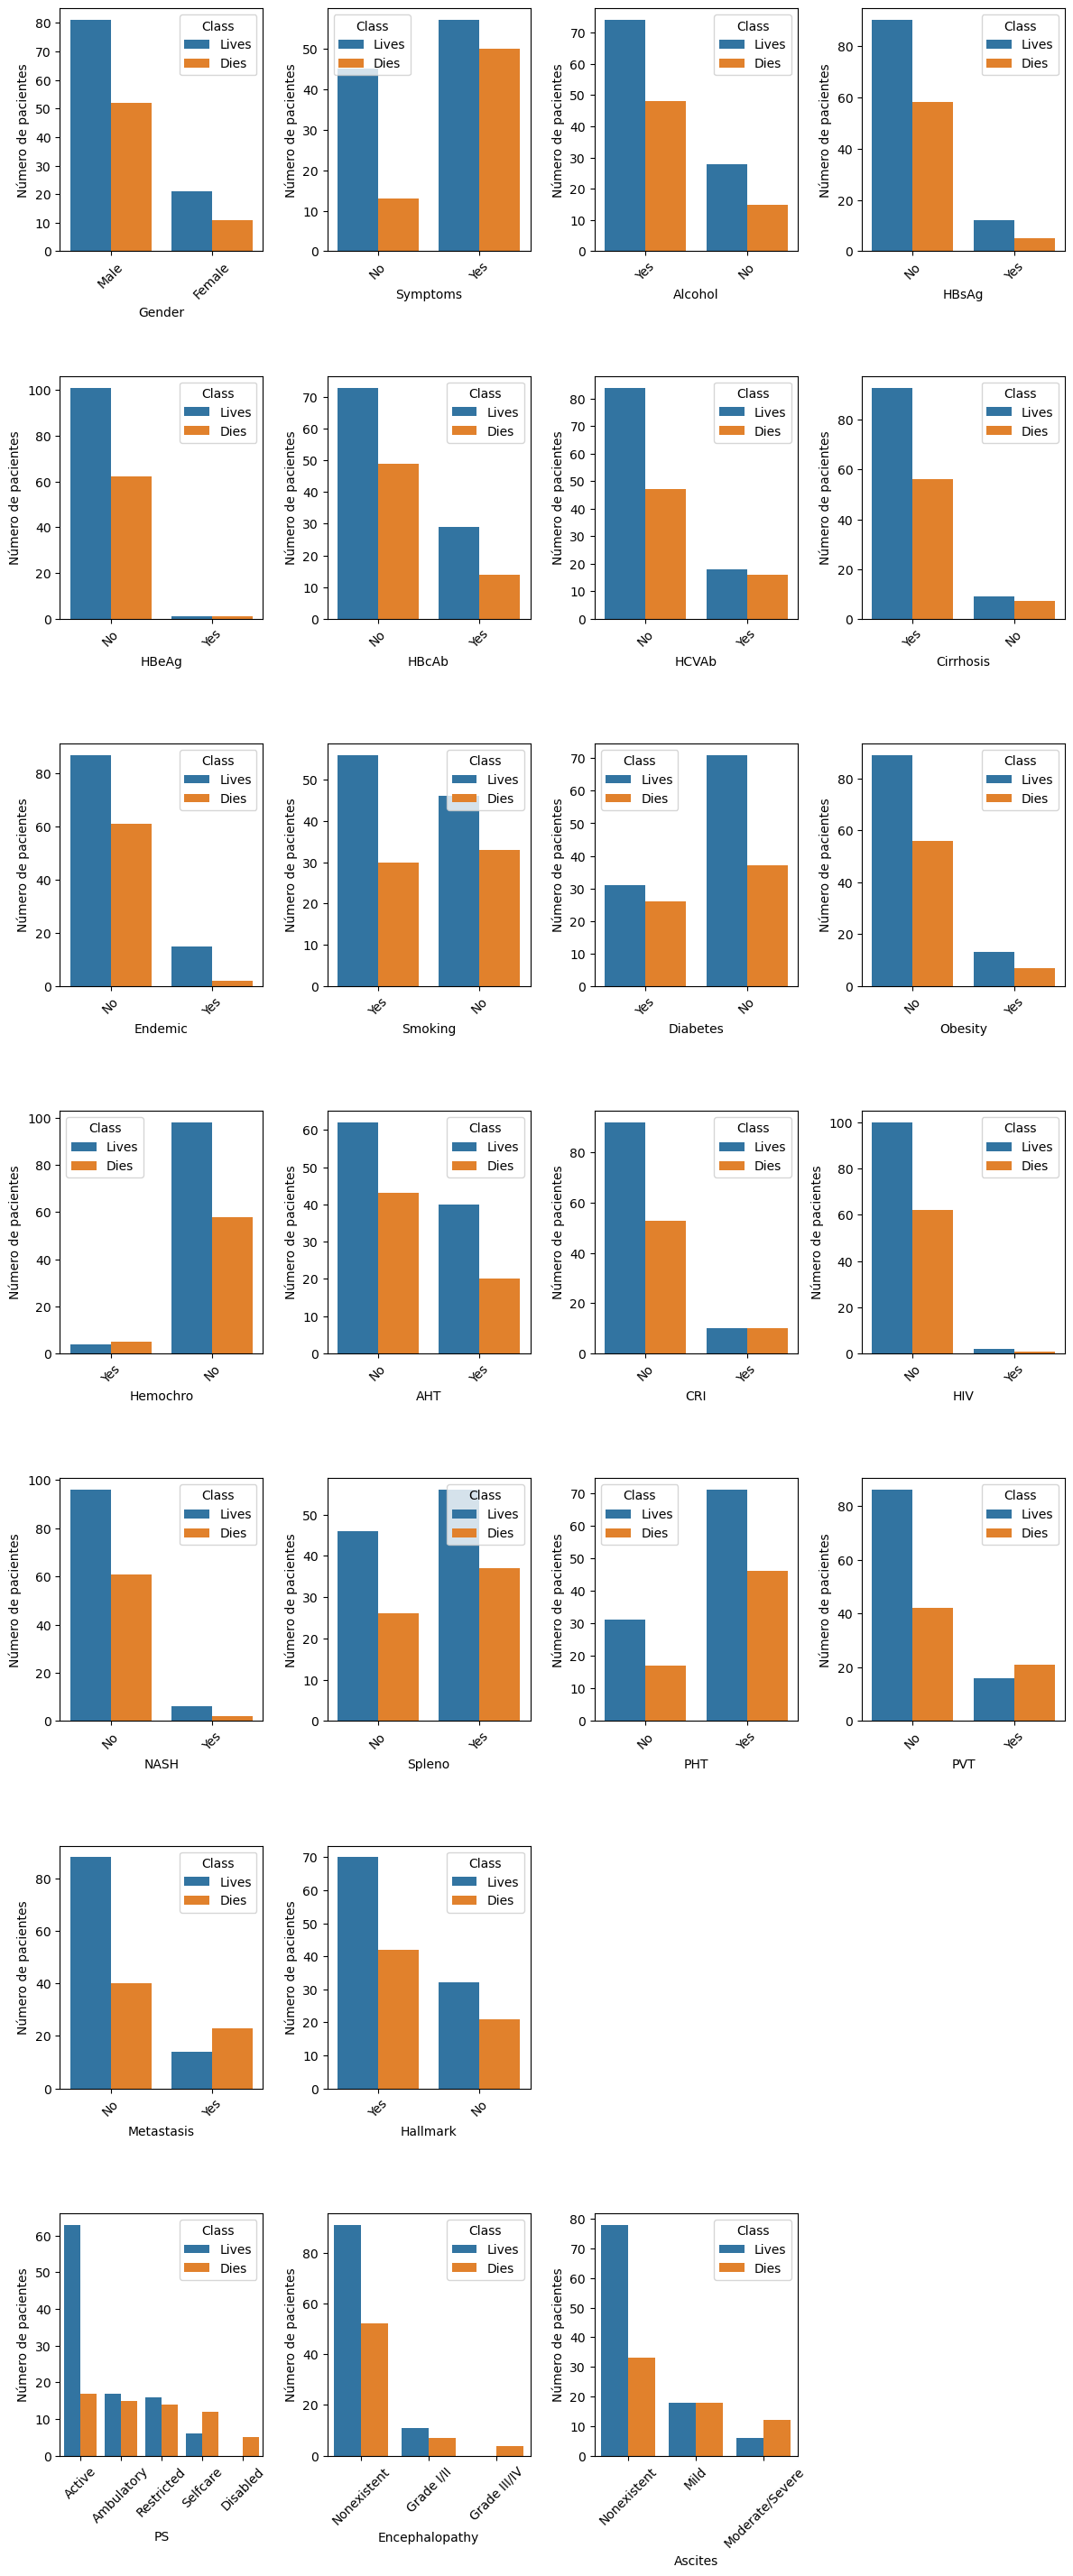

In [24]:
num_linhas = (len(df.columns) + 2) // 3  
plt.figure(figsize=(12, 4 * num_linhas))

for i in range(len(df.columns)):
    if i <= 21 or 24<=i<=26 :
        plt.subplot(num_linhas, 4, i + 1)
        sns.countplot(data=df, x=df.columns[i], hue='Class')
        plt.ylabel('Número de pacientes')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Para tentar perceber a existência de alguma colinearidade entre as colunas numéricas vamos criar um heatmap.

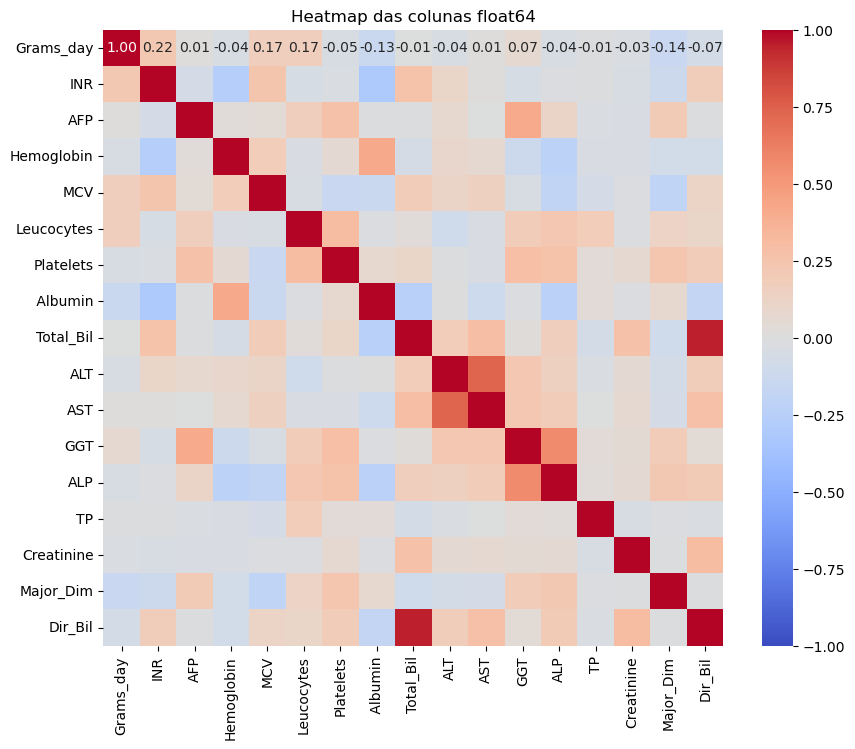

In [25]:
numeric_columns = df.select_dtypes(include='float64')

if not numeric_columns.empty:
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1 , vmax=1)

    plt.title('Heatmap das colunas float64')
    plt.show()

## Aplicação de modelos (Supervised Learning)

Para podermos utilizar os algoritmos necessários precisamos de converter, o dataframe inteiramente para númerico, exceto a target.

In [26]:
mapping = {
    "No": 0,
    "Yes": 1,
    "Active": 2,
    "Ambulatory": 3,
    "Restricted": 4,
    "Selfcare": 5,
    "Disabled": 6,
    "Nonexistent": 7,
    "Grade I/II": 8,
    "Grade III/IV": 9,
    "Mild": 10,
    "Moderate/Severe": 11,
    "Male": 12,
    "Female": 13,
}

df_num = df.replace(mapping)

In [27]:
df_num

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,12,0,1,0,0,0,0,1,0,1,...,34.0000,41.0000,183.0000,150.0000,7.100,0.7000,1,3.5,0.50,Lives
1,13,1,0,0,0,0,1,1,1,0,...,67.0932,96.3827,268.0265,212.2116,8.961,1.1271,1,1.8,1.93,Lives
2,12,0,1,1,0,1,0,1,0,1,...,58.0000,68.0000,202.0000,109.0000,7.000,2.1000,5,13.0,0.10,Lives
3,12,1,1,0,0,0,0,1,0,1,...,16.0000,64.0000,94.0000,174.0000,8.100,1.1100,2,15.7,0.20,Dies
4,12,1,1,1,0,1,0,1,0,1,...,147.0000,306.0000,173.0000,109.0000,6.900,1.8000,1,9.0,1.93,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,13,0,1,0,0,0,1,1,0,1,...,35.0000,40.0000,449.0000,109.0000,7.600,0.7000,5,3.0,1.93,Lives
161,13,1,0,0,0,0,0,1,0,0,...,50.0000,91.0000,147.0000,280.0000,6.700,0.7000,1,2.2,2.30,Dies
162,12,0,1,0,0,0,0,1,0,1,...,53.0000,52.0000,164.0000,181.0000,7.500,1.4600,5,18.6,1.93,Lives
163,12,0,1,1,0,1,1,1,1,1,...,50.0000,60.0000,320.0000,170.0000,8.400,0.7400,5,18.0,1.93,Dies


### Definição dos conjuntos train e test

Nesta etapa vamos proceder à divisão dos dados em dois conjuntos, "train" e "test" (que terá um tamanho de 10% em relação aos "train"). Definimos também a variável "target" como sendo a categoria 'Class' (é o que pretendemos prever) e as outras categorias como "features".

In [28]:
target=df_num[['Class']]

In [29]:
target

,Class
0,Lives
1,Lives
2,Lives
3,Dies
4,Lives
...,...
160,Lives
161,Dies
162,Lives
163,Dies


Como temos 44 possíveis features vamos testar a importância delas 11 a 11. Sendo assim vamos fazer 4 testes para verificar quais as colunas mais influentes e por fim assumir essas colunas como features para utilizar nos algoritmos.

In [30]:
features_1 = df_num.iloc[:, :11]  # Primeiras 11 features
features_2 = df_num.iloc[:, 11:22]  # Segundas 11 features
features_3 = df_num.iloc[:, 22:33]  # Terceiras 11 features
features_4 = df_num.iloc[:, 33:44]  # Últimas 11 features

In [31]:
features_1.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes
0,12,0,1,0,0,0,0,1,0,1,1
1,13,1,0,0,0,0,1,1,1,0,1
2,12,0,1,1,0,1,0,1,0,1,0
3,12,1,1,0,0,0,0,1,0,1,1
4,12,1,1,1,0,1,0,1,0,1,0


In [90]:
feature_sets = [features_1, features_2, features_3, features_4]
important_features = []

for i, features in enumerate(feature_sets, start=1):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.10, random_state=42)
    
    Tree = DecisionTreeClassifier(criterion = 'gini')
    Tree.fit(features_train, target_train)
    
    print(f"Feature Set {i}:")
    for col, val in sorted(zip(features.columns, Tree.feature_importances_), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{col:10}{val:10.3f}")
    print('\n')
    
    important_features.extend(features.columns[Tree.feature_importances_ >= 0.1])

important_features = list(set(important_features))
print("Features com importância >= 0.1:", important_features)

Feature Set 1:
Endemic        0.192
Symptoms       0.161
HCVAb          0.148
Gender         0.109
Smoking        0.092
Diabetes       0.075
HBcAb          0.064
Alcohol        0.049
HBsAg          0.041
Cirrhosis      0.036


Feature Set 2:
Metastasis     0.183
Spleno         0.154
Hallmark       0.129
PVT            0.110
AHT            0.106
Obesity        0.087
NASH           0.078
CRI            0.055
Hemochro       0.049
PHT            0.038


Feature Set 3:
AFP            0.217
Leucocytes     0.162
Age            0.135
Platelets      0.122
Hemoglobin     0.111
INR            0.092
PS             0.086
Ascites        0.032
Encephalopathy     0.023
MCV            0.020


Feature Set 4:
ALP            0.305
AST            0.190
Dir_Bil        0.109
ALT            0.087
GGT            0.081
TP             0.069
 Albumin       0.065
Major_Dim      0.039
Creatinine     0.034
Total_Bil      0.022


Features com importância >= 0.1: ['Gender', 'Hallmark', 'Age', 'Hemoglobin', 'AST', 'PVT

As features com valor superior ou igual a 0.1 foram adicionadas á lista "important_features". Agora que temos as features com mais importância vamos criar um novo grupo de features com elas 

In [33]:
features = df_num[important_features]

Vamos agora definir os conjuntos "train" e "test" tanto para as features como para o nosso objetivo "target", usando a funçao "train_test_split" da biblioteca "sklearn.model_selection"

In [34]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.10,random_state=42)

In [35]:
features_train

,Hallmark,Age,PS,AST,PVT,Platelets,HCVAb,AFP,Endemic,Smoking,ALP,Spleno,Symptoms,AHT,Metastasis
105,1,67,5,71.0,0,120.0,0,2.5,0,0,97.0,1,1,1,0
153,1,87,5,54.0,0,277.0,0,33.0,0,0,338.0,0,1,0,0
16,1,72,5,63.0,1,58.0,0,60.0,0,1,235.0,1,0,0,0
75,1,61,2,357.0,0,80000.0,1,2269.0,0,0,174.0,1,1,0,0
18,1,64,4,23.0,0,137.0,0,8.8,1,1,180.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,59,5,86.0,1,433000.0,0,1810346.0,0,1,417.0,0,1,0,1
106,1,50,2,226.0,0,121000.0,1,32.0,0,1,174.0,1,1,0,0
14,1,63,3,116.0,0,128.0,0,29.0,0,1,163.0,1,0,1,0
92,1,79,5,31.0,0,108.0,0,226.0,0,0,222.0,0,1,1,0


In [36]:
features_test

,Hallmark,Age,PS,AST,PVT,Platelets,HCVAb,AFP,Endemic,Smoking,ALP,Spleno,Symptoms,AHT,Metastasis
135,1,71,4,52.0,0,280000.0,0,2.6,0,0,123.0,0,1,1,1
115,0,55,2,113.0,0,286000.0,0,736.0,0,1,629.0,1,1,0,0
131,1,55,3,94.0,0,135000.0,0,7.5,0,1,147.0,0,0,0,0
55,1,78,4,19.0,0,174000.0,1,77.0,0,0,923.0,0,1,1,1
95,0,78,4,17.0,0,228000.0,0,2.4,0,0,124.0,0,0,0,0
29,1,20,4,112.0,0,556.0,0,1.9,0,1,974.0,0,1,0,0
158,1,71,5,59.0,0,209000.0,0,1713.0,0,0,263.0,1,1,0,0
51,0,73,2,94.0,0,275000.0,1,41470.0,0,0,350.0,1,0,0,1
101,1,52,4,192.0,0,77000.0,1,6574.0,0,1,262.0,1,1,1,1
145,0,80,2,51.0,0,157000.0,0,4.8,0,0,141.0,0,1,1,0


Estes dois comandos foram apenas para verificar se os conjuntos estão bem separados

### Implementação dos modelos

Com os conjuntos definidos e dataframe limpo, vamos dar início à quinta etapa onde iremos implementar os modelos sugeridos pelos professores, os quais foram o DecisionTreeClassifier e K-Nearest Neighbours. Para além destes decidimos implementar mais dois modelos, de modo a deixar a nossa pesquisa mais completa: Random Forest Classifier e o Naive Bayes.

Antes de começar a implementar os modelos vamos criar duas funções que calculam e demonstram graficamente a accuracy e o cross validation score dos futuros algoritmos.

In [38]:
def average_tree_score(classifier):
    model_accuracies = []
    for repetition in range(100):
        x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.15)
        classifier=classifier.fit(x_train,np.array(y_train).ravel())
        classifier_accuracy = classifier.score(x_test, y_test)
        model_accuracies.append(classifier_accuracy)
    plt.hist(model_accuracies)
    plt.title('Accuracy average score: {}'.format(np.average(model_accuracies)))
    plt.show()

In [39]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, features,  np.array(target).ravel(),cv=11)
    plt.figure()
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))
    plt.show()

### DecisionTreeClassifier

### 1º Teste

Para este primeiro teste, iremos utilizar uma decision tree com o critério "gini".

In [40]:
Tree_gini=DecisionTreeClassifier(criterion = 'gini')

In [41]:
Tree_gini=Tree_gini.fit(features_train,target_train)
Tree_gini.score(features_test,target_test)

0.5294117647058824

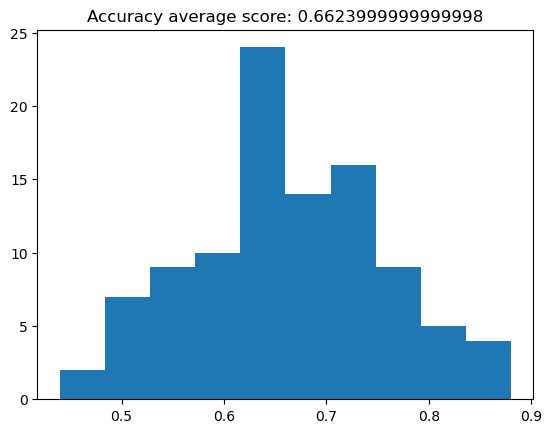

In [42]:
average_tree_score(Tree_gini)

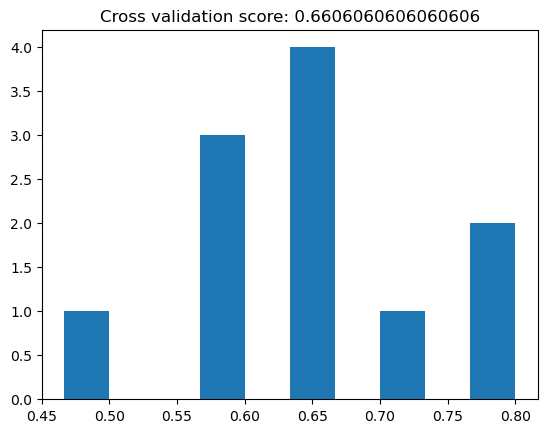

In [43]:
cross(Tree_gini)

### 2º Teste

Para o segundo teste, iremos utilizar uma decision tree com o critério "entropy".

In [44]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.15,random_state=42)

In [45]:
Tree_entropy=DecisionTreeClassifier(criterion = 'entropy')

In [46]:
Tree_entropy=Tree_entropy.fit(features_train,target_train)
Tree_entropy.score(features_test,target_test)

0.56

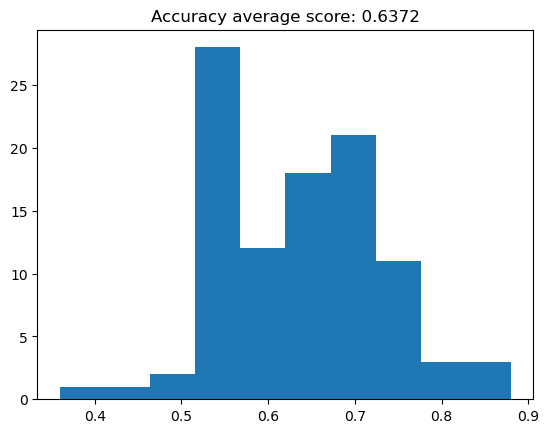

In [47]:
average_tree_score(Tree_entropy)

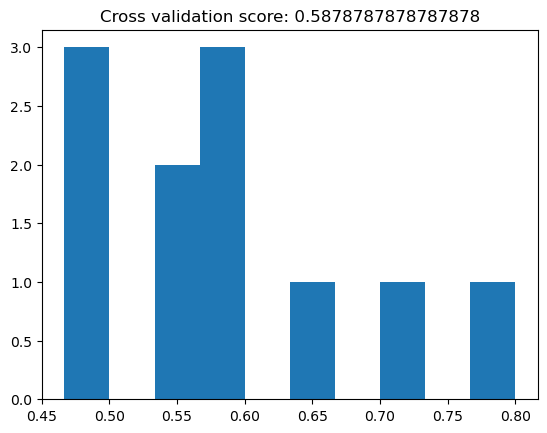

In [48]:
cross(Tree_entropy)

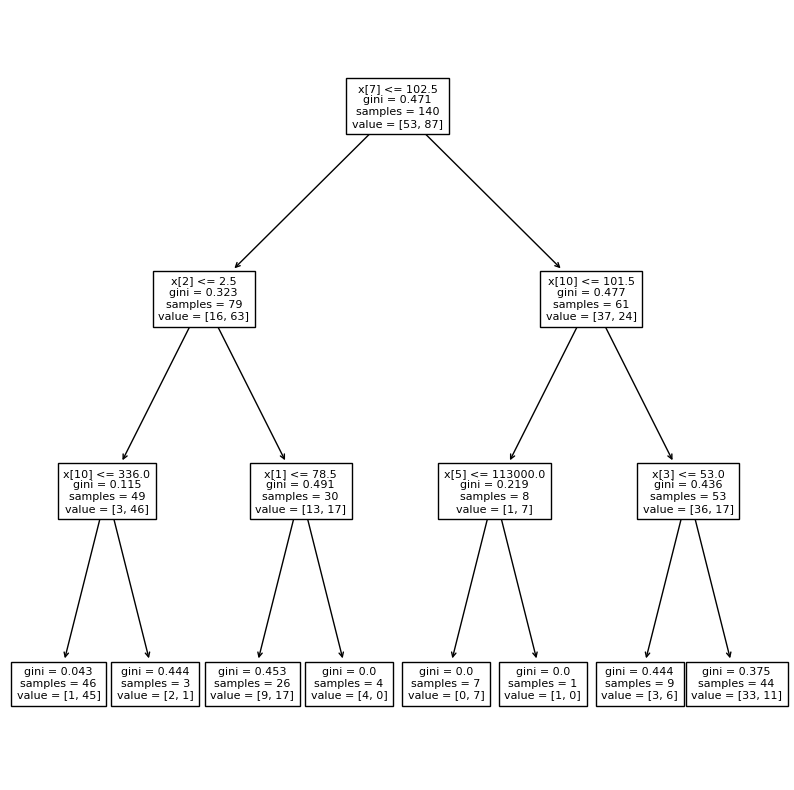

In [49]:
decision_tree_classifier = tree.DecisionTreeClassifier(max_depth=3)
decision_tree_classifier.fit(features_train, target_train)
plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_classifier,fontsize=8)
plt.show()

A melhor das duas trees foi a tree com o critério "gini"

### KNN (K-nearest neighbours)

Vamos agora testar o algoritmo Knn.

In [50]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.15,random_state=42)

In [51]:
knn= KNeighborsClassifier()

In [52]:
knn=knn.fit(features_train,np.array(target_train).ravel())
knn.score(features_test,target_test)

0.6

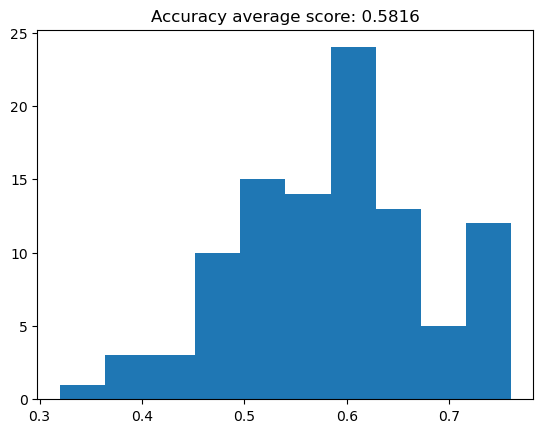

In [53]:
average_tree_score(knn)

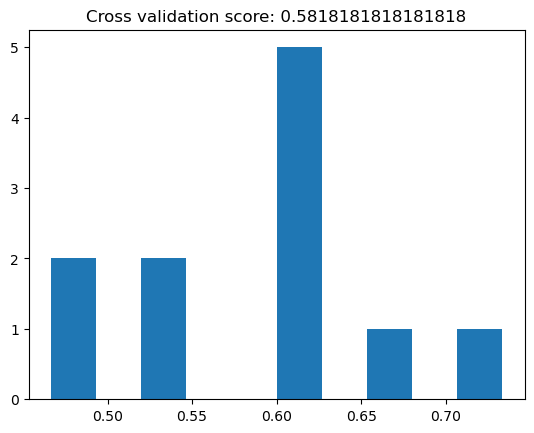

In [54]:
cross(knn)

### Random Forest Classifier

Para o primeiro teste do Random Forest Classifier, vamos usar o critério "gini".

### 1º Teste

In [55]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.15,random_state=42)

In [56]:
Random_gini=RandomForestClassifier(n_estimators=100,criterion='gini')

In [57]:
Random_gini=Random_gini.fit(features_train,np.array(target_train).ravel())
Random_gini.score(features_test,target_test)

0.68

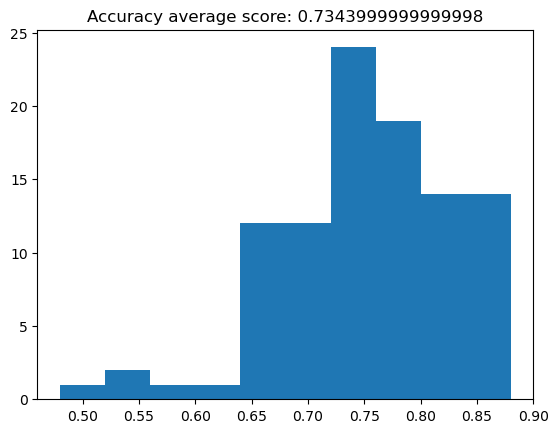

In [58]:
average_tree_score(Random_gini)

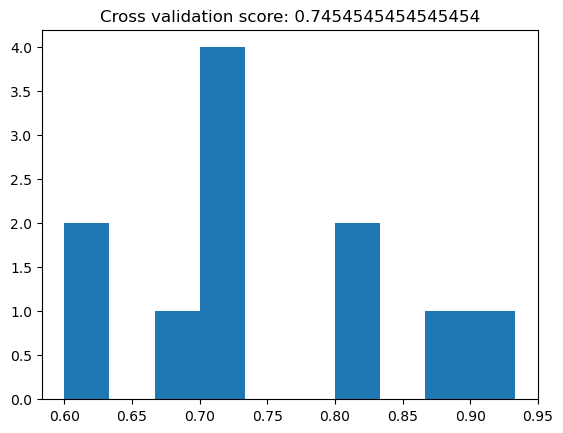

In [59]:
cross(Random_gini)

### 2º Teste

No segundo teste do Random Forest Classifier, vamos usar o critério "entropy".

In [60]:
Random_entropy=RandomForestClassifier(n_estimators=100,criterion='entropy')

In [61]:
Random_entropy=Random_entropy.fit(features_train,np.array(target_train).ravel())
Random_entropy.score(features_test,target_test)

0.72

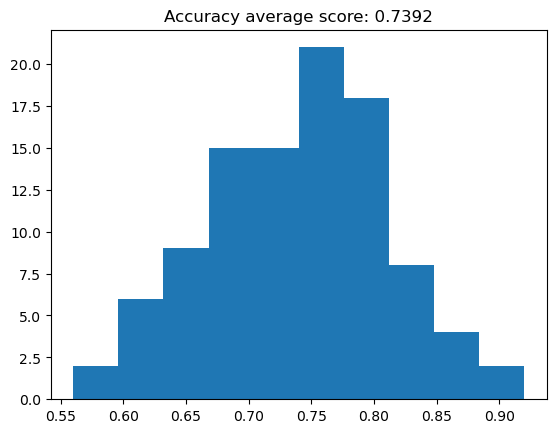

In [62]:
average_tree_score(Random_entropy)

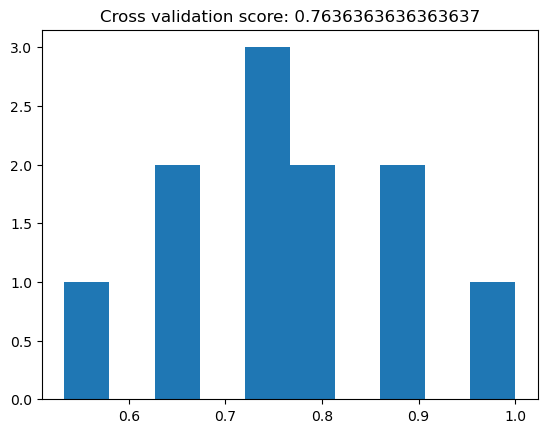

In [63]:
cross(Random_entropy)

O melhor algoritmo Random Forest foi o com o critério "entropy"

### Naive Bayes

Por último vamos testar o Naive Bayes, um algoritmo considerado como simples e eficaz.

In [64]:
naive_bayes_model = GaussianNB()

In [65]:
naive_bayes_model.fit(features_train, np.ravel(target_train))
naive_bayes_model.score(features_test,target_test)

0.68

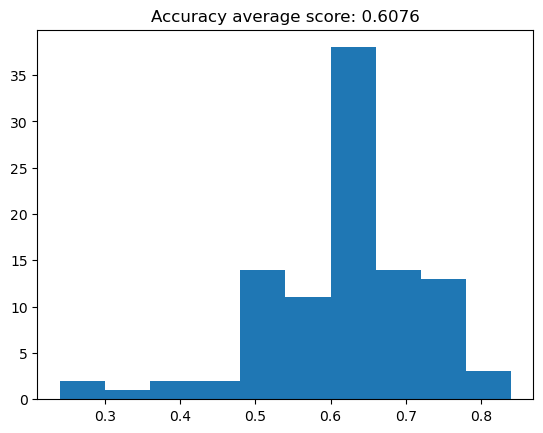

In [66]:
average_tree_score(naive_bayes_model)

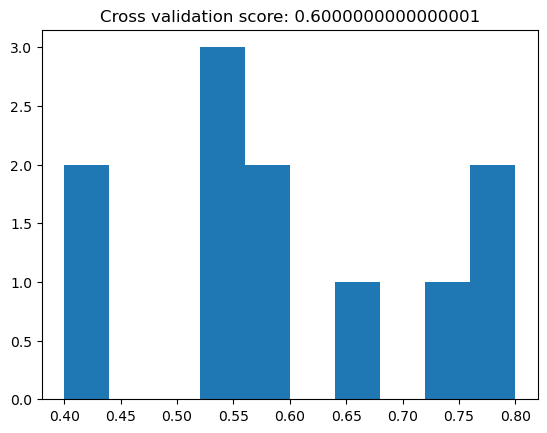

In [67]:
cross(naive_bayes_model)

### Data Evaluation

Para avaliar o desempenho dos modelos aplicados vamos visualizar as matrizes de confusão e o gráfico ROC dos modelos.

Para tal vamos primeiro definir as funções que criam as matrizes e os gráficos.

In [74]:
def predict_array(classifier, features):
    n = len(features)
    pred_column = [] * (n + 1)
    for i in range(n):
        pred_column.append(classifier.predict(features.iloc[[i]]))
    return pd.DataFrame(pred_column, columns=['Class'])

def confusion_matrix_draw(classifier, features_test, target_test):    
    predictions = predict_array(classifier, features_test)
    cf = confusion_matrix(target_test, predictions)
    g = sns.heatmap(cf, annot=True, cmap='Blues')
    g.set_title('Confusion Matrix\n\n')
    g.set_xlabel('\nPredicted Values')
    g.set_ylabel('Actual Values ')
    g.xaxis.set_ticklabels(['Dies', 'Lives'])
    g.yaxis.set_ticklabels(['Dies', 'Lives'])
    plt.show()

In [80]:
def plot_roc_curve(classifier, features_test, target_test):
    target_test_binary = (target_test == 'Lives').astype(int)
    probabilities = classifier.predict_proba(features_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(target_test_binary, probabilities)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

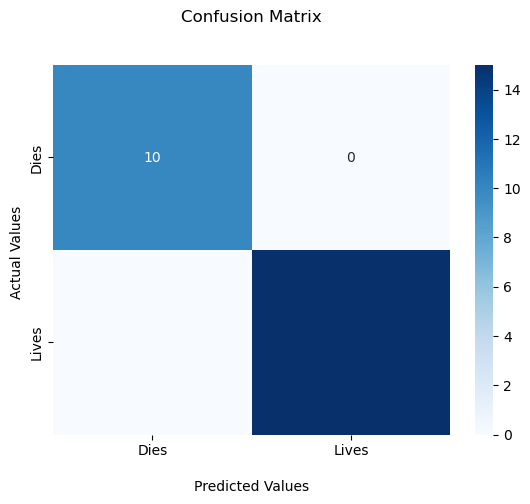

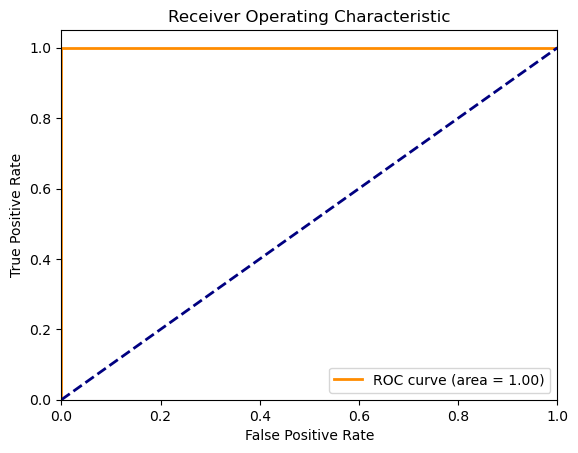

In [81]:
confusion_matrix_draw(Tree_gini , features_test, target_test)
plot_roc_curve(Tree_gini , features_test, target_test)

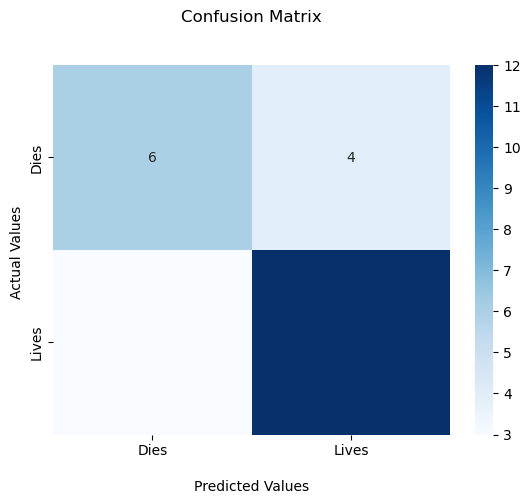

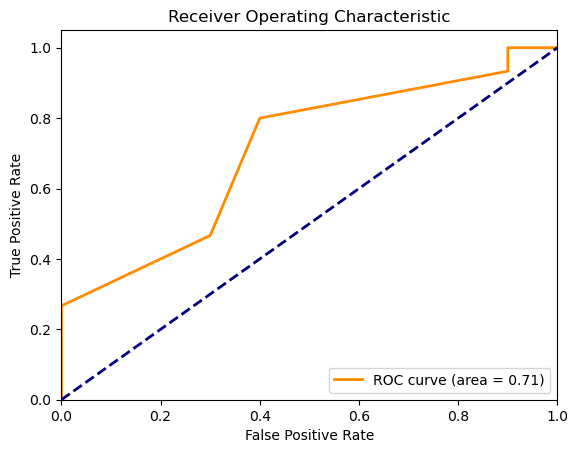

In [82]:
confusion_matrix_draw(knn , features_test, target_test)
plot_roc_curve(knn , features_test, target_test)

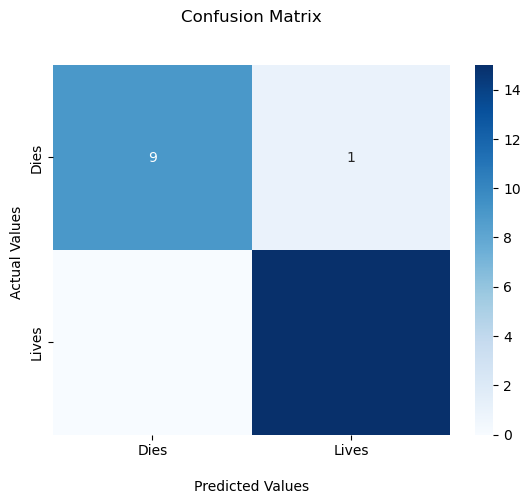

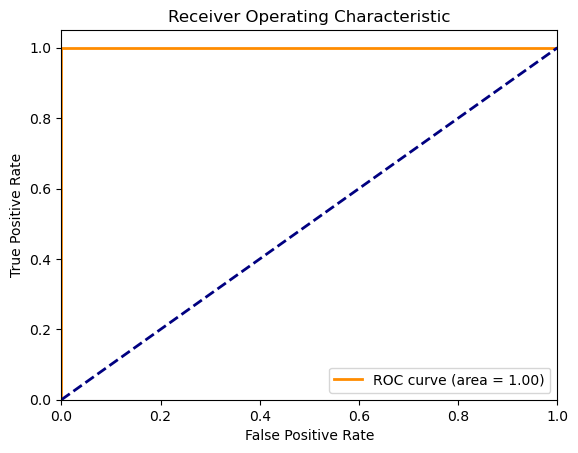

In [83]:
confusion_matrix_draw(Random_entropy , features_test, target_test)
plot_roc_curve(Random_entropy , features_test, target_test)

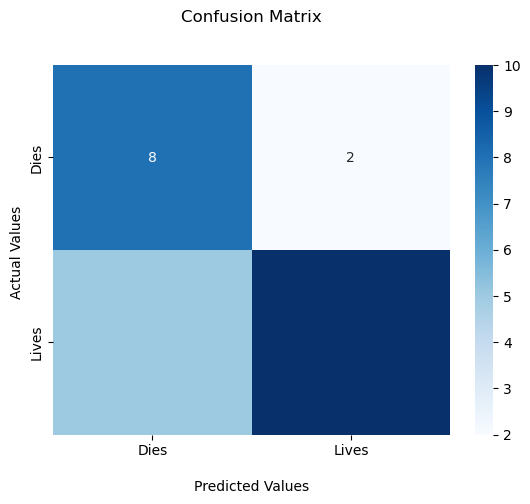

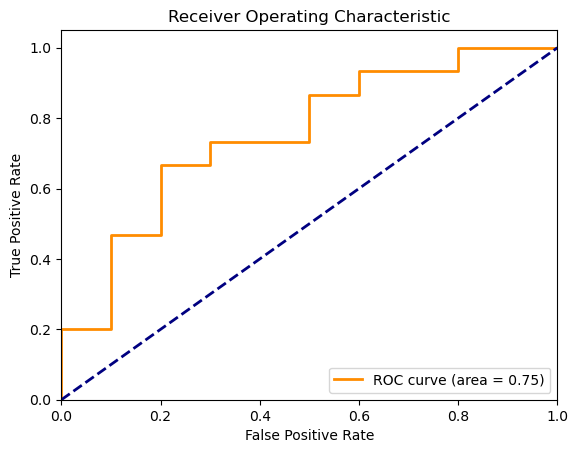

In [84]:
confusion_matrix_draw(naive_bayes_model , features_test, target_test)
plot_roc_curve(naive_bayes_model , features_test, target_test)

Por ultimo vamos comparar as accuracies dos modelos através de um boxplot.

In [85]:
def cross2(classifier):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())    
    return np.array(cross_val_score(classifier, features,  np.array(target).ravel(),cv=11))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


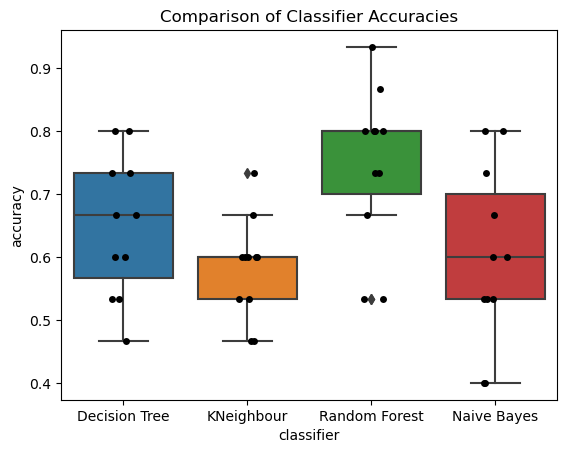

In [88]:
dt_df = pd.DataFrame({'accuracy': cross2(Tree_gini), 'classifier': ['Decision Tree'] * 11})
knn_df = pd.DataFrame({'accuracy': cross2(knn), 'classifier': ['KNeighbour'] * 11})
rf_df = pd.DataFrame({'accuracy': cross2(Random_entropy), 'classifier': ['Random Forest'] * 11})
nb_df = pd.DataFrame({'accuracy': cross2(naive_bayes_model), 'classifier': ['Naive Bayes'] * 11})

all_df = pd.concat([dt_df, knn_df, rf_df, nb_df])

sns.boxplot(x='classifier', y='accuracy', data=all_df)
sns.stripplot(x='classifier', y='accuracy', data=all_df, jitter=True, color='black')
plt.title('Comparison of Classifier Accuracies')
plt.show()

### Interpertação dos resultados e Conclusões

A avaliação dos modelos de classificação revelou insights importantes sobre o desempenho dos algoritmos utilizados: Decision Tree Classifier, K-Nearest Neighbors (KNN), Random Forest Classifier e Naive Bayes. 

O Random Forest Classifier demonstrou ser o mais eficaz entre os modelos testados, oferecendo uma combinação robusta de alta acurácia e baixa variabilidade nos resultados. Este desempenho superior pode ser atribuído à sua capacidade de reduzir overfitting através da combinação de múltiplas árvores de decisão.

Algo a ressaltar neste trabalho foi também a importância da análise do dataset. Tanto a eliminação/substituição de células nulas, como a eliminação de colunas que não estão diretamente ligadas ao objetivo final, são essenciais para obter uma alta precisão e acima de tudo resultados confiáveis.

Em suma, através deste trabalho conseguimos concluir que o melhor modelo para o dataset fornecido é o RandomForestClassifier, e que a análise e tratamento dos dados é tão ou mais importante como a implementação do modelo.